In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:

(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [3]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [4]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [5]:
y_test = y_test.reshape(-1,)

In [6]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [7]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

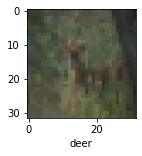

In [8]:
plot_sample(X_train, y_train, 10)

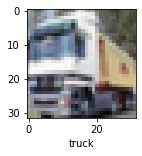

In [9]:
plot_sample(X_train, y_train,1)

In [10]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [11]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history1=ann.fit(X_train, y_train, epochs=50,batch_size = 64 ,validation_split = 0.2)

Epoch 1/50
625/625 [==============================] - 21s 33ms/step - loss: 1.8797 - accuracy: 0.3303 - val_loss: 1.7622 - val_accuracy: 0.3895
Epoch 2/50
625/625 [==============================] - 21s 33ms/step - loss: 1.7033 - accuracy: 0.4046 - val_loss: 1.6879 - val_accuracy: 0.4090
Epoch 3/50
625/625 [==============================] - 22s 35ms/step - loss: 1.6264 - accuracy: 0.4305 - val_loss: 1.6514 - val_accuracy: 0.4177
Epoch 4/50
625/625 [==============================] - 21s 34ms/step - loss: 1.5718 - accuracy: 0.4482 - val_loss: 1.6115 - val_accuracy: 0.4348
Epoch 5/50
625/625 [==============================] - 21s 33ms/step - loss: 1.5304 - accuracy: 0.4660 - val_loss: 1.5766 - val_accuracy: 0.4472
Epoch 6/50
625/625 [==============================] - 20s 31ms/step - loss: 1.4923 - accuracy: 0.4783 - val_loss: 1.5467 - val_accuracy: 0.4543
Epoch 7/50
625/625 [==============================] - 20s 31ms/step - loss: 1.4644 - accuracy: 0.4890 - val_loss: 1.5375 - val_accuracy:

In [12]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 1.3804 - accuracy: 0.5339


[1.3804372549057007, 0.5339000225067139]

In [13]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 2s 6ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.63      0.55      0.59      1000
           1       0.68      0.61      0.64      1000
           2       0.55      0.31      0.40      1000
           3       0.38      0.36      0.37      1000
           4       0.41      0.55      0.47      1000
           5       0.50      0.36      0.42      1000
           6       0.60      0.61      0.61      1000
           7       0.67      0.56      0.61      1000
           8       0.47      0.83      0.60      1000
           9       0.57      0.59      0.58      1000

    accuracy                           0.53     10000
   macro avg       0.55      0.53      0.53     10000
weighted avg       0.55      0.53      0.53     10000



In [14]:
hist_frame = pd.DataFrame(history1.history)
hist_frame

,loss,accuracy,val_loss,val_accuracy
0,1.879731,0.330325,1.762183,0.3895
1,1.703256,0.404575,1.687933,0.4090
2,1.626424,0.430475,1.651407,0.4177
3,1.571836,0.448225,1.611544,0.4348
4,1.530359,0.465975,1.576612,0.4472
5,1.492252,0.478275,1.546686,0.4543
6,1.464418,0.488975,1.537535,0.4617
7,1.435738,0.498625,1.517183,0.4677
8,1.404458,0.506625,1.518148,0.4697
9,1.381868,0.518025,1.457848,0.4926


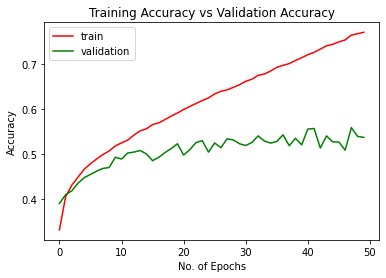

In [15]:
plt.figure(0)
plt.plot(hist_frame['accuracy'],'r')
plt.plot(hist_frame['val_accuracy'],'g')
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])
plt.show()

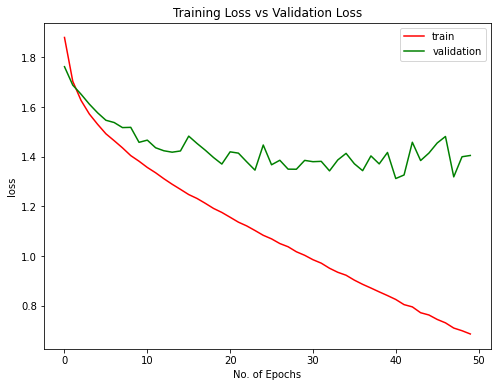

In [16]:
plt.figure(1)
plt.plot(hist_frame['loss'], 'r')
plt.plot(hist_frame ['val_loss'], 'g')
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel('No. of Epochs')
plt.ylabel('loss')
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])
plt.show()

In [17]:
# Now let us build a DNN with convolutional neural network to train our images

cnn = models.Sequential([
        layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu", input_shape=[32,32,3]),
        layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu"),
        layers.MaxPool2D(pool_size=2,strides=2,padding='valid'),

        layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu"),
        layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu"),
        layers.MaxPool2D(pool_size=2,strides=2,padding='valid'),

        layers.Dropout(0.5,noise_shape=None,seed=None),
        
        layers.Flatten(),
        layers.Dense(units=128,activation='relu'),
        layers.Dense(units=10,activation='softmax')
])

In [18]:
cnn.compile(optimizer='adamax',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
history2 = cnn.fit(X_train, y_train, epochs=100,batch_size = 64 ,validation_split = 0.2)

Epoch 1/100
625/625 [==============================] - 62s 98ms/step - loss: 0.1464 - accuracy: 0.9478 - val_loss: 0.8294 - val_accuracy: 0.7931
Epoch 2/100
625/625 [==============================] - 60s 96ms/step - loss: 0.1434 - accuracy: 0.9496 - val_loss: 0.8209 - val_accuracy: 0.7940
Epoch 3/100
625/625 [==============================] - 57s 91ms/step - loss: 0.1332 - accuracy: 0.9527 - val_loss: 0.8200 - val_accuracy: 0.7899
Epoch 4/100
625/625 [==============================] - 64s 103ms/step - loss: 0.1296 - accuracy: 0.9534 - val_loss: 0.8702 - val_accuracy: 0.7856
Epoch 5/100
625/625 [==============================] - 65s 104ms/step - loss: 0.1319 - accuracy: 0.9531 - val_loss: 0.8587 - val_accuracy: 0.7936
Epoch 6/100
625/625 [==============================] - 67s 107ms/step - loss: 0.1246 - accuracy: 0.9557 - val_loss: 0.8663 - val_accuracy: 0.7895
Epoch 7/100
625/625 [==============================] - 67s 107ms/step - loss: 0.1255 - accuracy: 0.9552 - val_loss: 0.8489 - va

625/625 [==============================] - 63s 101ms/step - loss: 0.0651 - accuracy: 0.9770 - val_loss: 1.0282 - val_accuracy: 0.7925
Epoch 58/100
625/625 [==============================] - 56s 90ms/step - loss: 0.0664 - accuracy: 0.9772 - val_loss: 1.0046 - val_accuracy: 0.7946
Epoch 59/100
625/625 [==============================] - 56s 89ms/step - loss: 0.0646 - accuracy: 0.9776 - val_loss: 1.0499 - val_accuracy: 0.7917
Epoch 60/100
625/625 [==============================] - 57s 92ms/step - loss: 0.0677 - accuracy: 0.9766 - val_loss: 0.9957 - val_accuracy: 0.7960
Epoch 61/100
625/625 [==============================] - 58s 93ms/step - loss: 0.0639 - accuracy: 0.9779 - val_loss: 1.0156 - val_accuracy: 0.7967
Epoch 62/100
625/625 [==============================] - 64s 102ms/step - loss: 0.0640 - accuracy: 0.9779 - val_loss: 1.0201 - val_accuracy: 0.7969
Epoch 63/100
625/625 [==============================] - 61s 98ms/step - loss: 0.0652 - accuracy: 0.9773 - val_loss: 0.9844 - val_accura

In [20]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 8ms/step - loss: 0.8334 - accuracy: 0.7917


[0.8334000110626221, 0.791700005531311]

In [21]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [22]:
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
y_pred_classes[:5]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 3s 8ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.80      0.82      1000
           1       0.89      0.89      0.89      1000
           2       0.72      0.72      0.72      1000
           3       0.63      0.60      0.62      1000
           4       0.74      0.78      0.76      1000
           5       0.71      0.68      0.69      1000
           6       0.86      0.82      0.84      1000
           7       0.81      0.85      0.83      1000
           8       0.85      0.91      0.88      1000
           9       0.85      0.87      0.86      1000

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000



In [23]:
hist_frame1 = pd.DataFrame(history2.history)

In [24]:
hist_frame1

,loss,accuracy,val_loss,val_accuracy
0,1.696705,0.382750,1.423242,0.4865
1,1.356627,0.514300,1.237070,0.5685
2,1.189146,0.578300,1.083177,0.6210
3,1.065731,0.625400,1.048618,0.6384
4,0.978984,0.655775,0.938178,0.6767
5,0.910688,0.679950,0.866013,0.7005
6,0.848874,0.703250,0.837897,0.7077
7,0.798099,0.721250,0.799578,0.7236
8,0.751595,0.734925,0.764484,0.7354
9,0.704739,0.753825,0.773285,0.7323


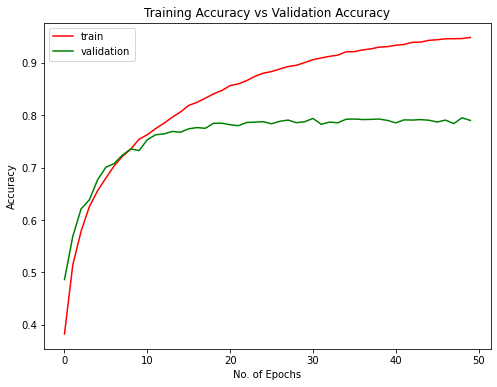

In [25]:
plt.figure(0)
plt.plot(hist_frame1['accuracy'],'r')
plt.plot(hist_frame1['val_accuracy'],'g')
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])
plt.show()

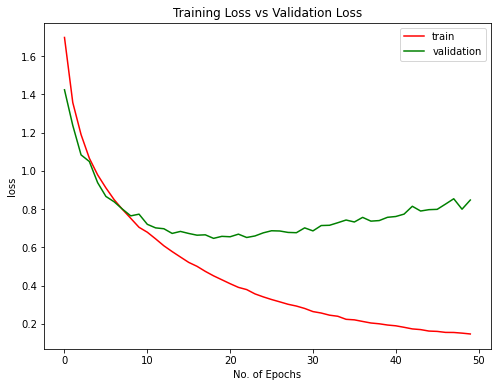

In [26]:
plt.figure(1)
plt.plot(hist_frame1['loss'],'r')
plt.plot(hist_frame1['val_loss'],'g')
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel('No. of Epochs')
plt.ylabel('loss')
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])
plt.show()

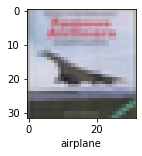

In [27]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

plot_sample(X_test, y_test,3)

In [28]:
classes[y_classes[3]]

'airplane'